# Exploratory Analysis and Predictive Modelling for Direct Marketing Campaigns of a Portuguese Banking Institution


Author: Lidiia Kliuchna
Programme of Study: MS Computational Linguistics


 URL: https://archive.ics.uci.edu/dataset/222/bank+marketing

In [115]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 
  
# data (as pandas dataframes) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets 
  
# metadata 
print(bank_marketing.metadata) 
  
# variable information 
print(bank_marketing.variables) 


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'title': 'A data-driven approach to predict the success of bank telemarketing'

In [116]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

In [117]:

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert 'yes' and 'no' to numerical labels (0 and 1)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Define categorical features for one-hot encoding
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Create a ColumnTransformer for one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), categorical_features)],
    remainder='passthrough'
)

pipeline_logistic = Pipeline(steps=[('preprocessor', preprocessor),
                                     ('regressor', LogisticRegression())])

# Train the logistic regression model
pipeline_logistic.fit(X_train, y_train)

# Make predictions with logistic regression
y_pred_logistic = pipeline_logistic.predict(X_test)

# Calculate accuracy for logistic regression
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Logistic Regression Accuracy:", accuracy_logistic)





/Users/lidiiakliuchna/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lidiiakliuchna/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/Users/lidiiakliuchna/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression Accuracy: 0.8894172287957536


/Users/lidiiakliuchna/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Linear Regression Mean Squared Error: 0.07324506339323494
Linear Regression R-squared: 0.30959758965795126


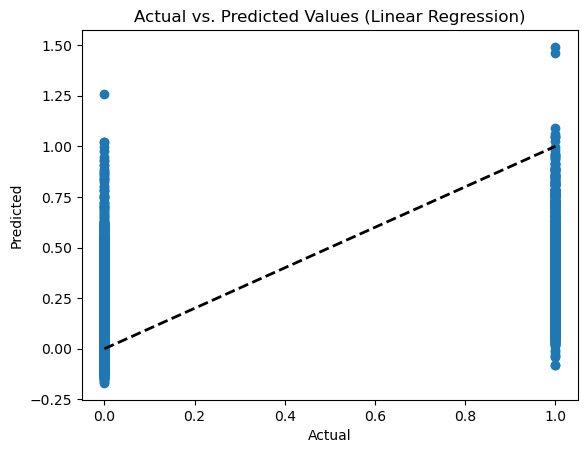

In [118]:
# Create a pipeline with preprocessing and linear regression
pipeline_linear = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('regressor', LinearRegression())])

# Train the linear regression model
pipeline_linear.fit(X_train, y_train_encoded)

# Make predictions with linear regression
y_pred_linear = pipeline_linear.predict(X_test)

# Calculate mean squared error for linear regression
mse_linear = mean_squared_error(y_test_encoded, y_pred_linear)
print("Linear Regression Mean Squared Error:", mse_linear)

# Calculate R-squared for linear regression
r_squared_linear = r2_score(y_test_encoded, y_pred_linear)
print("Linear Regression R-squared:", r_squared_linear)

# Visualize the predicted values against the true values for linear regression
plt.scatter(y_test_encoded, y_pred_linear)
plt.plot([y_test_encoded.min(), y_test_encoded.max()], [y_test_encoded.min(), y_test_encoded.max()], 'k--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted Values (Linear Regression)")
plt.show()



Ridge Classifier Accuracy: 0.8971580227800509
Ridge Classifier Precision: 0.6761487964989059
Ridge Classifier Recall: 0.2832263978001833


/Users/lidiiakliuchna/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  sample_weight : float or ndarray of shape (n_samples,), default=None


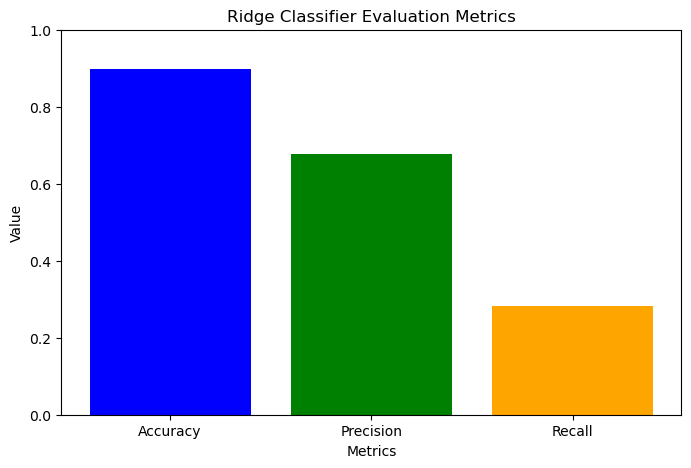

In [119]:
# Create a pipeline with preprocessing and Ridge classifier
pipeline_ridge = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', RidgeClassifier())])

# Train the Ridge classifier model
pipeline_ridge.fit(X_train, y_train)

# Make predictions with Ridge classifier
y_pred_ridge = pipeline_ridge.predict(X_test)

# Calculate accuracy for Ridge classifier
accuracy_ridge = accuracy_score(y_test, y_pred_ridge)
print("Ridge Classifier Accuracy:", accuracy_ridge)

# Calculate precision for Ridge classifier
precision_ridge = precision_score(y_test, y_pred_ridge, pos_label='yes')
print("Ridge Classifier Precision:", precision_ridge)

# Calculate recall for Ridge classifier
recall_ridge = recall_score(y_test, y_pred_ridge, pos_label='yes')
print("Ridge Classifier Recall:", recall_ridge)

# Values for visualization
metrics = ['Accuracy', 'Precision', 'Recall']
values_ridge = [accuracy_ridge, precision_ridge, recall_ridge]

# Create a bar plot for Ridge classifier evaluation metrics
plt.figure(figsize=(8, 5))
plt.bar(metrics, values_ridge, color=['blue', 'green', 'orange'])
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Ridge Classifier Evaluation Metrics')
plt.ylim(0, 1)
plt.show()



Naive Bayes Classifier Accuracy: 0.8476169412805485
Naive Bayes Classifier Precision: 0.40375586854460094
Naive Bayes Classifier Recall: 0.5517873510540788


/Users/lidiiakliuchna/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


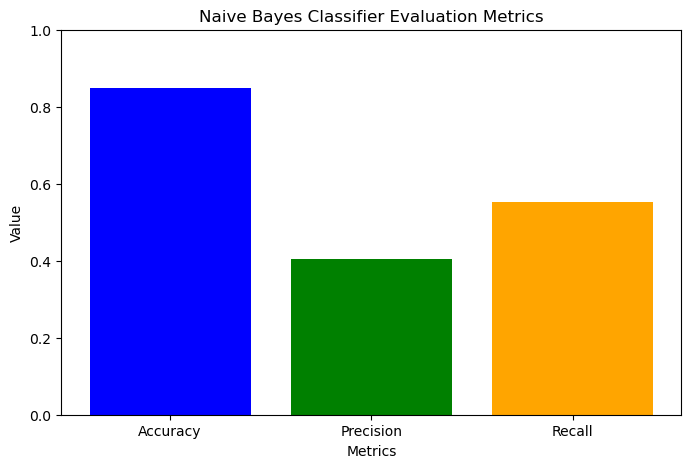

In [120]:
# Create a pipeline with preprocessing and Naive Bayes classifier
pipeline_naive_bayes = Pipeline(steps=[('preprocessor', preprocessor),
                                       ('classifier', GaussianNB())])

# Train the Naive Bayes classifier model
pipeline_naive_bayes.fit(X_train, y_train)

# Make predictions with Naive Bayes classifier
y_pred_naive_bayes = pipeline_naive_bayes.predict(X_test)

# Calculate accuracy for Naive Bayes classifier
accuracy_naive_bayes = accuracy_score(y_test, y_pred_naive_bayes)
print("Naive Bayes Classifier Accuracy:", accuracy_naive_bayes)

# Calculate precision for Naive Bayes classifier
precision_naive_bayes = precision_score(y_test, y_pred_naive_bayes, pos_label='yes')
print("Naive Bayes Classifier Precision:", precision_naive_bayes)


# Calculate recall for Naive Bayes classifier
recall_naive_bayes = recall_score(y_test, y_pred_naive_bayes, pos_label='yes')
print("Naive Bayes Classifier Recall:", recall_naive_bayes)


# Values for visualization
values_naive_bayes = [accuracy_naive_bayes, precision_naive_bayes, recall_naive_bayes]

# Create a bar plot for Naive Bayes classifier evaluation metrics
plt.figure(figsize=(8, 5))
plt.bar(metrics, values_naive_bayes, color=['blue', 'green', 'orange'])
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Naive Bayes Classifier Evaluation Metrics')
plt.ylim(0, 1)
plt.show()


In [121]:

# Calculate F1-score for Ridge classifier
f1_ridge = f1_score(y_test, y_pred_ridge, pos_label='yes')
print("Ridge Classifier F1-score:", f1_ridge)

# Calculate F1-score for Naive Bayes classifier
f1_naive_bayes = f1_score(y_test, y_pred_naive_bayes, pos_label='yes')
print("Naive Bayes Classifier F1-score:", f1_naive_bayes)

Ridge Classifier F1-score: 0.3992248062015504
Naive Bayes Classifier F1-score: 0.46630518977536795


In [122]:
# Encode the predictions for Logistic Regression and Linear Regression
y_pred_logistic_encoded = y_pred_logistic  # No need for encoding, already numerical labels
y_pred_linear_encoded = ['yes' if pred >= 0.5 else 'no' for pred in y_pred_linear]

# Determine the unique labels present in y_test
unique_labels = set(y_test)

# Use one of the unique labels as pos_label for calculating F1-score
pos_label = 'yes' if 'yes' in unique_labels else 'no'

# Calculate F1-score for logistic regression
f1_score_logistic_regression = f1_score(y_test, y_pred_logistic_encoded, pos_label=pos_label)

# Calculate F1-scores for Logistic Regression and Linear Regression
f1_score_logistic_regression = f1_score(y_test, y_pred_logistic_encoded, pos_label=pos_label)
f1_score_linear_regression = f1_score(y_test, y_pred_linear_encoded, pos_label='yes')

# Print F1-scores for Logistic Regression and Linear Regression
print("Logistic Regression F1-score:", f1_score_logistic_regression)
print("Linear Regression F1-score:", f1_score_linear_regression)


Logistic Regression F1-score: 0.9397227245328511
Linear Regression F1-score: 0.39896707553260163


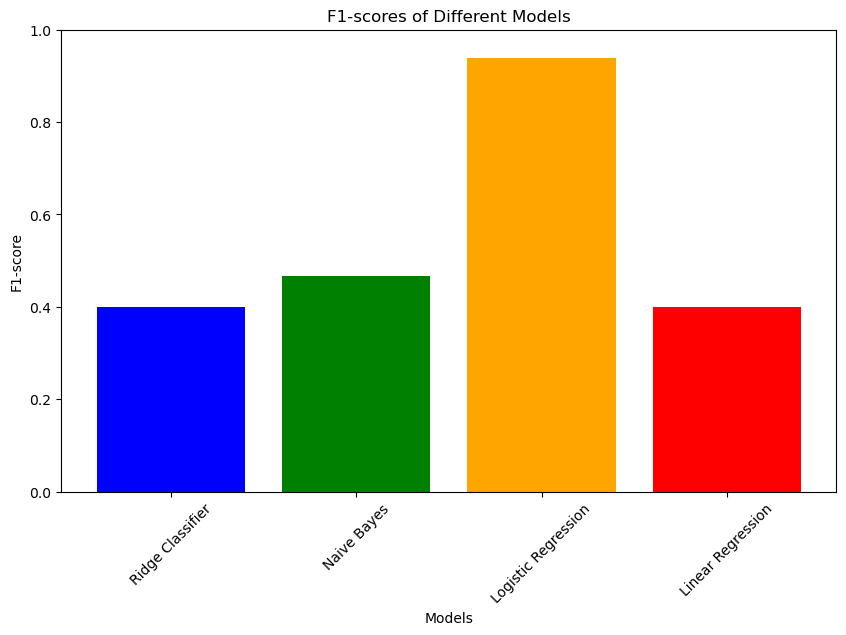

In [123]:

# F1-scores
f1_scores = [f1_ridge, f1_naive_bayes, f1_score_logistic_regression, f1_score_linear_regression]
models = ['Ridge Classifier', 'Naive Bayes', 'Logistic Regression', 'Linear Regression']

# Plot
plt.figure(figsize=(10, 6))
plt.bar(models, f1_scores, color=['blue', 'green', 'orange', 'red'])
plt.title('F1-scores of Different Models')
plt.xlabel('Models')
plt.ylabel('F1-score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()
